What is your Car Project?
You have a dataset of cars described by different features:

buying price (like low, medium, high, very high)

maintenance cost

number of doors

capacity (persons)

luggage boot size

safety rating

And the important thing — a label for each car called class, which tells how acceptable the car is. Classes include things like:

unacceptable

acceptable

good

very good

In [94]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




1. Collect data

You start with a dataset of many cars, each with features and known acceptability.

In [85]:
Columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('car.data', names=Columns)
print(data.head(19))

   buying  maint doors persons lug_boot safety  class
0   vhigh  vhigh     2       2    small    low  unacc
1   vhigh  vhigh     2       2    small    med  unacc
2   vhigh  vhigh     2       2    small   high  unacc
3   vhigh  vhigh     2       2      med    low  unacc
4   vhigh  vhigh     2       2      med    med  unacc
5   vhigh  vhigh     2       2      med   high  unacc
6   vhigh  vhigh     2       2      big    low  unacc
7   vhigh  vhigh     2       2      big    med  unacc
8   vhigh  vhigh     2       2      big   high  unacc
9   vhigh  vhigh     2       4    small    low  unacc
10  vhigh  vhigh     2       4    small    med  unacc
11  vhigh  vhigh     2       4    small   high  unacc
12  vhigh  vhigh     2       4      med    low  unacc
13  vhigh  vhigh     2       4      med    med  unacc
14  vhigh  vhigh     2       4      med   high  unacc
15  vhigh  vhigh     2       4      big    low  unacc
16  vhigh  vhigh     2       4      big    med  unacc
17  vhigh  vhigh     2      

In [86]:
#preprocessing #Check for missing values
print(data.isnull().sum())


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


2. Preprocess data

Convert categorical words (like “vhigh”, “med”, “low”) into numbers, so your computer can understand them.

For features, this often means one-hot encoding (making separate yes/no columns).

For the target (class), label encode it to numbers (like unacc = 0, acc = 1, etc.).

In [87]:
# One-Hot Encode all features except 'class'
data_encoded = pd.get_dummies(data, columns=Columns[:-1])

# Label Encode the target 'class'
le = LabelEncoder()
data_encoded['class'] = le.fit_transform(data['class'])

3. Split data

You split the dataset into:

A training set to teach the model

A test set to check if the model learned well and can predict on new, unseen cars.

In [88]:
X = data_encoded.drop('class', axis=1)              #X = input features (all columns except 'class')
y = data_encoded['class']            #y = target variable (the 'class' column)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Train a model

You use Logistic Regression (or other algorithms) to learn the relationship between car features and the class.

In [90]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [91]:
y_pred = model.predict(X_test)

In [92]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9595375722543352

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93        83
           1       0.62      0.91      0.74        11
           2       0.98      1.00      0.99       235
           3       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



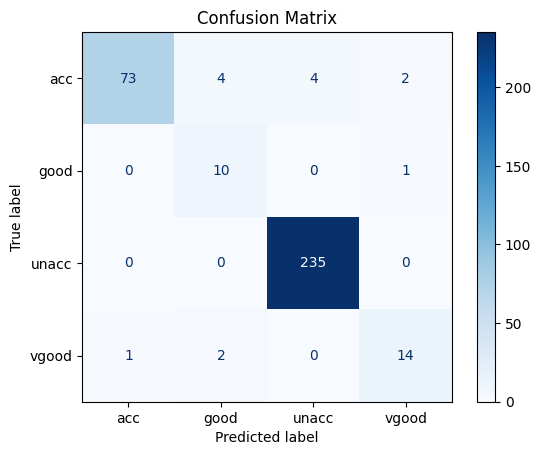

In [95]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)  # le = your label encoder for classes
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
